In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_blobs, make_classification

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Prepare the data for Logistic Regression

### Read the relevant data sets

In [42]:
data = pd.read_csv('Clean_data.csv')

In [43]:
data.shape

(558211, 66)

In [44]:
data['treatment_days'] = [0 if x == 'None' else x for x in data['treatment_days']]

In [45]:
data["treatment_days"] = pd.to_numeric(data["treatment_days"])


In [46]:
fraud = pd.read_csv('Train_fraud.csv')

### Groupby provider

In [47]:
def groupby_provider(data):
    '''
    This function converts DOD and gender to binary code and groups data by provider.
    '''
    data['DOD'] = [0 if x == 'None' else 1 for x in data['DOD']]
    
    data['Gender'] = [1 if x == 2 else 0 for x in data['Gender']]
    
    num_claims = data.groupby('Provider')['ClaimID'].count()
    
    sum_features = data.groupby('Provider')[['DOD', 'ClmAdmitDiagnosisCode','Inpatient','ClmProcedureCode','ClmProcedureCode_count',
                             'ClmDiagnosisCode_count', 'RenalDiseaseIndicator', 'duplicate','V5869_diagcode',
                            'Other_diagcode','V5861_diagcode','2724_diagcode','4011_diagcode',
                            '2449_diagcode','4019_diagcode','25000_diagcode','42731_diagcode',
                                            'None_PHY']].sum().reset_index() 
    
    mean_features = data.groupby('Provider')[['Patient_Connections','AttPhys_Connections','InscClaimAmtReimbursed',
                            'DeductibleAmtPaid','treatment_days','Gender', 'IPAnnualReimbursementAmt', 
                                  'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'IPAnnualDeductibleAmt',
                                  'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'num_chronic',
                                  'Age','claim_Days']].mean().reset_index()
    
    data2 = pd.merge(num_claims, sum_features, how="outer", on="Provider")
    
    data3 = pd.merge(data2, mean_features, how="outer", on="Provider")
    
    return data3

In [48]:
data = groupby_provider(data)

In [49]:
data.shape

(5410, 35)

In [50]:
data.head()

,Provider,ClaimID,DOD,ClmAdmitDiagnosisCode,Inpatient,ClmProcedureCode,ClmProcedureCode_count,ClmDiagnosisCode_count,RenalDiseaseIndicator,duplicate,V5869_diagcode,Other_diagcode,V5861_diagcode,2724_diagcode,4011_diagcode,2449_diagcode,4019_diagcode,25000_diagcode,42731_diagcode,None_PHY,Patient_Connections,AttPhys_Connections,InscClaimAmtReimbursed,DeductibleAmtPaid,treatment_days,Gender,IPAnnualReimbursementAmt,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,num_chronic,Age,claim_Days
0,PRV51001,25,0,11,5.0,2.0,3.0,80.0,8.0,12,1,25,0,2,0,1,3,1,2,0,24.0,14.0,4185.600000,213.600000,1.000000,0.640000,17606.000000,12.000000,12.000000,897.120000,2615.200000,463.920000,5.560000,77.880000,1.440000
1,PRV51003,132,1,78,62.0,39.0,48.0,693.0,29.0,30,7,132,6,16,3,12,25,15,11,0,117.0,44.0,4588.409091,502.166667,2.424242,0.590909,7568.181818,11.818182,11.871212,931.424242,2678.181818,737.121212,4.545455,69.083333,3.674242
2,PRV51004,149,1,28,0.0,0.0,0.0,385.0,23.0,76,2,149,4,12,6,8,22,8,3,0,138.0,38.0,350.134228,2.080537,0.000000,0.691275,4351.879195,11.865772,11.959732,434.953020,2194.899329,622.751678,4.342282,71.261745,1.429530
3,PRV51005,1165,4,252,0.0,0.0,0.0,3016.0,259.0,565,56,1165,47,73,62,30,140,54,23,2,495.0,7.0,241.124464,3.175966,0.000000,0.561373,3623.991416,11.907296,11.939914,379.162232,2109.733906,636.328755,4.335622,69.526180,1.088412
4,PRV51007,72,1,17,3.0,1.0,1.0,215.0,11.0,31,2,72,7,5,3,6,10,6,2,0,58.0,10.0,468.194444,45.333333,0.222222,0.527778,3050.000000,11.833333,11.833333,445.000000,1729.722222,469.722222,4.166667,68.305556,0.958333


### Binary code PotentialFraud and merge fraud with data

In [51]:
fraud['PotentialFraud'] = [1 if x == 'Yes' else 0 for x in fraud['PotentialFraud']]

In [52]:
fraud.head()

,Provider,PotentialFraud
0,PRV51001,0
1,PRV51003,1
2,PRV51004,0
3,PRV51005,1
4,PRV51007,0


In [53]:
final_data = pd.merge(data, fraud, how="outer", on="Provider")

In [54]:
final_data.head()

,Provider,ClaimID,DOD,ClmAdmitDiagnosisCode,Inpatient,ClmProcedureCode,ClmProcedureCode_count,ClmDiagnosisCode_count,RenalDiseaseIndicator,duplicate,V5869_diagcode,Other_diagcode,V5861_diagcode,2724_diagcode,4011_diagcode,2449_diagcode,4019_diagcode,25000_diagcode,42731_diagcode,None_PHY,Patient_Connections,AttPhys_Connections,InscClaimAmtReimbursed,DeductibleAmtPaid,treatment_days,Gender,IPAnnualReimbursementAmt,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,num_chronic,Age,claim_Days,PotentialFraud
0,PRV51001,25,0,11,5.0,2.0,3.0,80.0,8.0,12,1,25,0,2,0,1,3,1,2,0,24.0,14.0,4185.600000,213.600000,1.000000,0.640000,17606.000000,12.000000,12.000000,897.120000,2615.200000,463.920000,5.560000,77.880000,1.440000,0
1,PRV51003,132,1,78,62.0,39.0,48.0,693.0,29.0,30,7,132,6,16,3,12,25,15,11,0,117.0,44.0,4588.409091,502.166667,2.424242,0.590909,7568.181818,11.818182,11.871212,931.424242,2678.181818,737.121212,4.545455,69.083333,3.674242,1
2,PRV51004,149,1,28,0.0,0.0,0.0,385.0,23.0,76,2,149,4,12,6,8,22,8,3,0,138.0,38.0,350.134228,2.080537,0.000000,0.691275,4351.879195,11.865772,11.959732,434.953020,2194.899329,622.751678,4.342282,71.261745,1.429530,0
3,PRV51005,1165,4,252,0.0,0.0,0.0,3016.0,259.0,565,56,1165,47,73,62,30,140,54,23,2,495.0,7.0,241.124464,3.175966,0.000000,0.561373,3623.991416,11.907296,11.939914,379.162232,2109.733906,636.328755,4.335622,69.526180,1.088412,1
4,PRV51007,72,1,17,3.0,1.0,1.0,215.0,11.0,31,2,72,7,5,3,6,10,6,2,0,58.0,10.0,468.194444,45.333333,0.222222,0.527778,3050.000000,11.833333,11.833333,445.000000,1729.722222,469.722222,4.166667,68.305556,0.958333,0


# Logistic Regression Analysis

From https://towardsdatascience.com/weighted-logistic-regression-for-imbalanced-dataset-9a5cd88e68b

"...evaluation metrics like ROC-AUC curve are a good indicator of classifier performance. It is a measure of how good model is at distinguishing between various class. Higher the ROC-AUC score, better the model is at predicting 0s as 0s and 1s as 1s. Just to remind, ROC is a probability curve and AUC represents degree or measure of separability. Apart from this metric, we will also check on recall score, false-positive (FP) and false-negative (FN) score as we build our classifier."

### Split into train and test for cross-validation

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# split dataset into x,y
x = final_data.drop(['Provider','PotentialFraud'],axis=1)
y = final_data['PotentialFraud']
# train-test split
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(x), y, test_size=0.3, random_state=13)

### Default model without class_weight or penalization

In [56]:
# define model
lg1 = LogisticRegression(random_state=13, class_weight=None, max_iter=2000)
# fit it
lg1.fit(X_train,y_train)
# test
y_pred = lg1.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.9260628465804066
Confusion Matrix: 
[[1437   20]
 [ 100   66]]
Area Under Curve: 0.6919317627407365
Recall score: 0.39759036144578314


In [194]:
y_test.value_counts()

0    1457
1     166
Name: PotentialFraud, dtype: int64

In [57]:
print("Default model correctly classified %f percent of the fraud cases in the test data" %((66/166)*100))
print("Default model misclassified %f percent of the non-fraud cases in the test data" %((20/1457)*100))

Default model correctly classified 39.759036 percent of the fraud cases in the test data
Default model misclassified 1.372684 percent of the non-fraud cases in the test data


### Weighted model based on proportion of data with majority label (PotentialFraud=0) vs. minority label (PotentialFraud=1)

In [55]:
print("majority label is %f of the data set" %((4904/5410)*100)) #4904 providers are non fraudulent
print("minority label is %f of the data set" %((506/5410)*100)) #506 providers are potentially fraudulent

majority label is 90.646950 of the data set
minority label is 9.353050 of the data set


In [58]:
# define class weights
w = {0:9, 1:91}# define model
lg2 = LogisticRegression(random_state=13, class_weight=w, max_iter=2000)
# fit it
lg2.fit(X_train,y_train)
# test
y_pred = lg2.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.8798521256931608
Confusion Matrix: 
[[1298  159]
 [  36  130]]
Area Under Curve: 0.8370020921021079
Recall score: 0.7831325301204819


In [59]:
print("Weighted model correctly classified %f percent of the fraud cases in the test data" %((130/166)*100))
print("Weighted model misclassified %f percent of the non-fraud cases in the test data" %((159/1457)*100))

Weighted model correctly classified 78.313253 percent of the fraud cases in the test data
Weighted model misclassified 10.912835 percent of the non-fraud cases in the test data


- AUC increased from 69.19% to 83.70%. 
- Recall Score (i.e., correct predictions for minority classs increased from 39.76% to 78.31% 

### Weights GridSearch to identify ideal class_weight parameter

In [64]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
hyperparam_grid = {"class_weight": w }

In [65]:
# define model
lg3 = LogisticRegression(random_state=13, max_iter = 2000)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="roc_auc", cv=100, refit=True)
grid.fit(StandardScaler().fit_transform(x),y)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.9302356462585034 with param: {'class_weight': {0: 1.0, 1: 10}}


From https://towardsdatascience.com/weighted-logistic-regression-for-imbalanced-dataset-9a5cd88e68b

"Note that optimal value of weights distribution identified by GridSearch is slightly different than what we used before i.e. inverse of class distribution. Factors that played out here are evaluation metric and cross-validation. You might receive a different weights value if you choose to work with a different evaluation metric. Using above weight values, lets build logistic regression."

### Conduct logistic regression with best class_weight parameter

In [66]:
# define model
lg3 = LogisticRegression(random_state=13, class_weight={0: 1.0, 1: 10}, max_iter=2000)
# fit it
lg3.fit(X_train,y_train)
# test
y_pred = lg3.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.8792359827479975
Confusion Matrix: 
[[1296  161]
 [  35  131]]
Area Under Curve: 0.8393277984966634
Recall score: 0.7891566265060241


In [67]:
print("Weighted model using GridSearch correctly classified %f percent of the fraud cases in the test data" %((131/166)*100))
print("Weighted model misclassified %f percent of the non-fraud cases in the test data" %((161/1457)*100))

Weighted model using GridSearch correctly classified 78.915663 percent of the fraud cases in the test data
Weighted model misclassified 11.050103 percent of the non-fraud cases in the test data


- AUC increased from 83.70% to 83.93%. 
- Recall Score (i.e., correct predictions for minority class) increased from 78.31% to 78.92% 

### Tune hyperparameters, including penalization, C, fit_intercept

In [70]:
# define hyperparameters
crange = np.arange(0.5, 2.0, 0.5)
hyperparam_grid = {"C": crange
                   ,"fit_intercept": [True, False]  }

In [71]:
# logistic model classifier
lg4 = LogisticRegression(random_state=13, penalty='l2', class_weight={0: 1.0, 1: 10}, max_iter=2000)
# define evaluation procedure
grid = GridSearchCV(lg4,hyperparam_grid,scoring="roc_auc", cv=100, refit=True)
grid.fit(StandardScaler().fit_transform(x),y)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.9340274829931977 with param: {'C': 0.5, 'fit_intercept': False}


In [72]:
# define model
lg4 = LogisticRegression(random_state=13,C=0.5,fit_intercept=False, penalty='l2',class_weight={0: 1.0, 1: 100}, max_iter=2000)
# fit it
lg4.fit(X_train,y_train)
# test
y_pred = lg4.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}') # 0.5
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.7775723967960567
Confusion Matrix: 
[[1107  350]
 [  11  155]]
Area Under Curve: 0.8467576551918036
Recall score: 0.9337349397590361


In [73]:
# logistic model classifier
lg5 = LogisticRegression(random_state=13, penalty='l1', solver='liblinear', class_weight={0: 1.0, 1: 100}, max_iter=2000)
# define evaluation procedure
grid = GridSearchCV(lg4,hyperparam_grid,scoring="roc_auc", cv=100, refit=True)
grid.fit(StandardScaler().fit_transform(x),y)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.9303570068027213 with param: {'C': 0.5, 'fit_intercept': True}


In [75]:
# define model
lg5 = LogisticRegression(random_state=13,C=0.5,fit_intercept=True, penalty='l1',solver='liblinear',class_weight={0: 1.0, 1: 100}, max_iter=2000)
# fit it
lg5.fit(X_train,y_train)
# test
y_pred = lg5.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}') # 0.5
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.6389402341343191
Confusion Matrix: 
[[874 583]
 [  3 163]]
Area Under Curve: 0.7908952212418652
Recall score: 0.9819277108433735


In [76]:
print("Weighted model using C=0.5, fit_intercept=False, and L2 penalty correctly classified %f percent of the fraud cases in the test data" %((155/166)*100))
print("Weighted model misclassified %f percent of the non-fraud cases in the test data" %((350/1457)*100))


Weighted model using C=0.5, fit_intercept=False, and L2 penalty correctly classified 93.373494 percent of the fraud cases in the test data
Weighted model misclassified 24.021963 percent of the non-fraud cases in the test data


- AUC increased from 83.93% to 84.68%. 
- Recall Score (i.e., correct predictions for minority class) increased from 78.92% to 93.37% 

"Now, with these hyperparameter values, logistic regression is good to use with above imbalance dataset. This also indicates that accuracy is not always the best evaluation metric." 

Accuracy was 92.61% with the default model and is 87.06% with the final model. The accuracy score decreased but AUC and Recall Score increased.

### Get Feature Importance based on ideal model

Feature: 0, Score: 1.70545
Feature: 1, Score: 0.14496
Feature: 2, Score: 0.27254
Feature: 3, Score: 2.22688
Feature: 4, Score: 0.75990
Feature: 5, Score: -0.52551
Feature: 6, Score: -1.46227
Feature: 7, Score: 1.70931
Feature: 8, Score: 0.72990
Feature: 9, Score: -1.33533
Feature: 10, Score: 1.70545
Feature: 11, Score: 0.18977
Feature: 12, Score: -0.68467
Feature: 13, Score: 0.95933
Feature: 14, Score: 0.46514
Feature: 15, Score: 1.04084
Feature: 16, Score: -1.45357
Feature: 17, Score: 0.80906
Feature: 18, Score: -0.24087
Feature: 19, Score: -2.99914
Feature: 20, Score: 1.01838
Feature: 21, Score: 0.23288
Feature: 22, Score: -1.29745
Feature: 23, Score: 1.98818
Feature: 24, Score: -0.09399
Feature: 25, Score: 0.37922
Feature: 26, Score: -0.00216
Feature: 27, Score: -0.02745
Feature: 28, Score: -0.25332
Feature: 29, Score: 0.04564
Feature: 30, Score: 0.00995
Feature: 31, Score: 0.53516
Feature: 32, Score: -0.02297
Feature: 33, Score: 0.01729


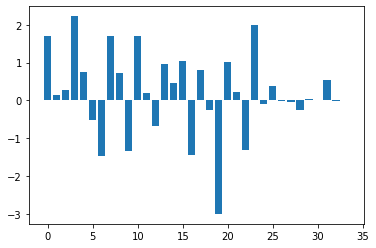

In [77]:
# get importance
importance = lg4.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#The positive scores indicate a feature that predicts class 1, 
#whereas the negative scores indicate a feature that predicts class 0.

In [78]:
x.columns

Index(['ClaimID', 'DOD', 'ClmAdmitDiagnosisCode', 'Inpatient',
       'ClmProcedureCode', 'ClmProcedureCode_count', 'ClmDiagnosisCode_count',
       'RenalDiseaseIndicator', 'duplicate', 'V5869_diagcode',
       'Other_diagcode', 'V5861_diagcode', '2724_diagcode', '4011_diagcode',
       '2449_diagcode', '4019_diagcode', '25000_diagcode', '42731_diagcode',
       'None_PHY', 'Patient_Connections', 'AttPhys_Connections',
       'InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'treatment_days',
       'Gender', 'IPAnnualReimbursementAmt', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'num_chronic',
       'Age', 'claim_Days'],
      dtype='object')

### Summary of Feature Importance


The following features are most important in classification of fraud vs. non-fraud. 

Red font indicates feature is important for detecting FRAUD.

Green font indicates feature is important for detecting NON-FRAUD.

(Positive values are important for classification of fraudulent providers. Negative values are important for classification of non-fraudulent providers.)

- <span style="color:red">Inpatient: 2.23</span>
- <span style="color:red">treatment_days: 1.99</span>
- <span style="color:red">ClaimID (number of claims): 1.71</span>
- <span style="color:red">RenalDiseaseIndicator: 1.71</span>
- <span style="color:red">Other_diagcode: 1.71</span>
- <span style="color:red">4019_diagcode: 1.04</span>
- <span style="color:red">AttPhys_Connections: 1.02</span>
- <span style="color:red">4011_diagcode: 0.96</span>
- <span style="color:red">42731_diagcode: 0.81</span>


- <span style="color:green">Patient_Connections: -3.00</span>
- <span style="color:green">ClmDiagnosisCode_count: -1.46</span>
- <span style="color:green">25000_diagcode: -1.45</span>
- <span style="color:green">V5869_diagcode: -1.34</span>
- <span style="color:green">DeductibleAmtPaid: -1.30</span>





In [245]:
x.head(500)

,ClaimID,DOD,ClmAdmitDiagnosisCode,Inpatient,ClmProcedureCode,ClmProcedureCode_count,ClmDiagnosisCode_count,RenalDiseaseIndicator,duplicate,V5869_diagcode,Other_diagcode,V5861_diagcode,2724_diagcode,4011_diagcode,2449_diagcode,4019_diagcode,25000_diagcode,42731_diagcode,PHY338032,None_PHY,PHY341578,PHY357120,PHY330576,PHY337425,PHY314027,PHY327046,PHY412132,PHY350277,PHY423534,Patient_Connections,AttPhys_Connections,InscClaimAmtReimbursed,DeductibleAmtPaid,treatment_days,Gender,IPAnnualReimbursementAmt,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,num_chronic,Age,claim_Days
0,25,0,11,5.0,2.0,3.0,80.0,8.0,12,1,25,0,2,0,1,3,1,2,0,0,0,0,0,0,0,0,0,0,0,24.0,14.0,4185.600000,213.600000,1.000000,0.640000,17606.000000,12.000000,12.000000,897.120000,2615.200000,463.920000,5.560000,77.880000,1.440000
1,132,1,78,62.0,39.0,48.0,693.0,29.0,30,7,132,6,16,3,12,25,15,11,0,0,0,0,0,0,0,0,0,0,0,117.0,44.0,4588.409091,502.166667,2.424242,0.590909,7568.181818,11.818182,11.871212,931.424242,2678.181818,737.121212,4.545455,69.083333,3.674242
2,149,1,28,0.0,0.0,0.0,385.0,23.0,76,2,149,4,12,6,8,22,8,3,0,0,0,0,0,0,0,0,0,0,0,138.0,38.0,350.134228,2.080537,0.000000,0.691275,4351.879195,11.865772,11.959732,434.953020,2194.899329,622.751678,4.342282,71.261745,1.429530
3,1165,4,252,0.0,0.0,0.0,3016.0,259.0,565,56,1165,47,73,62,30,140,54,23,0,2,0,0,0,0,0,0,0,0,0,495.0,7.0,241.124464,3.175966,0.000000,0.561373,3623.991416,11.907296,11.939914,379.162232,2109.733906,636.328755,4.335622,69.526180,1.088412
4,72,1,17,3.0,1.0,1.0,215.0,11.0,31,2,72,7,5,3,6,10,6,2,0,0,0,0,0,0,0,0,0,0,0,58.0,10.0,468.194444,45.333333,0.222222,0.527778,3050.000000,11.833333,11.833333,445.000000,1729.722222,469.722222,4.166667,68.305556,0.958333
5,43,0,9,2.0,2.0,2.0,136.0,10.0,17,0,43,2,7,2,3,9,4,2,0,0,0,0,0,0,0,0,0,0,0,36.0,10.0,828.604651,53.860465,0.186047,0.558140,6592.093023,12.000000,12.000000,620.930233,2570.465116,616.046512,3.906977,74.604651,1.534884
6,58,1,13,1.0,0.0,0.0,147.0,12.0,29,0,58,1,5,2,5,10,2,0,0,0,0,0,0,0,0,0,0,0,0,53.0,28.0,286.724138,23.586207,0.086207,0.534483,4414.827586,12.000000,12.000000,674.275862,1399.310345,366.724138,4.586207,73.431034,0.551724
7,48,0,17,0.0,0.0,0.0,123.0,7.0,22,1,48,1,2,2,2,5,0,1,0,1,0,0,0,0,0,0,0,0,0,31.0,15.0,351.875000,2.083333,0.000000,0.770833,6935.416667,12.000000,11.500000,839.916667,3793.958333,735.208333,4.625000,73.541667,3.708333
8,46,0,12,0.0,0.0,0.0,117.0,11.0,19,4,46,0,2,2,1,4,2,0,0,0,0,0,0,0,0,0,0,0,0,44.0,9.0,323.478261,5.000000,0.000000,0.739130,3635.652174,12.000000,12.000000,593.304348,3226.521739,914.782609,4.413043,73.413043,1.456522
9,30,1,5,0.0,0.0,0.0,110.0,8.0,8,2,30,0,2,0,1,6,4,1,0,1,0,0,0,0,0,0,0,0,0,25.0,8.0,349.333333,4.000000,0.000000,0.766667,2786.333333,12.000000,12.000000,427.200000,1742.333333,649.333333,4.333333,70.200000,0.466667


In [271]:
print(data.PHY338032.value_counts())
print(data.PHY341578.value_counts())
print(data.PHY357120.value_counts())
print(data.PHY330576.value_counts())
print(data.PHY337425.value_counts())
print(data.PHY314027.value_counts())
print(data.PHY327046.value_counts())
print(data.PHY412132.value_counts())
print(data.PHY350277.value_counts())
print(data.PHY423534.value_counts())

0    1353
Name: PHY338032, dtype: int64
0    1352
3       1
Name: PHY341578, dtype: int64
0    1353
Name: PHY357120, dtype: int64
0    1353
Name: PHY330576, dtype: int64
0    1353
Name: PHY337425, dtype: int64
0    1353
Name: PHY314027, dtype: int64
0    1353
Name: PHY327046, dtype: int64
0    1353
Name: PHY412132, dtype: int64
0    1353
Name: PHY350277, dtype: int64
0    1353
Name: PHY423534, dtype: int64
